In [266]:
# WHO Life Expectancy Dataset
# 193 Countries
# 22 Columns and 2938 rows
# This Dataset complies data of various factors of different countries over a few years.

# Qns to ask
# 1. Life Span VS Development level of country.
# 2. Impact of Education on Life Expectancy.
# 3. Countries with highest and lowest life expectancies.
# 4. Variance of expectancies in developed and developing countries.
# 5. Life expectancy in SG over the few years.
# 6. Adult Mortality, Infant deaths and Life expectancy in SG over the few years.

In [267]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [268]:
# Import Dataset, csv to df

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [269]:
# Structure of the Dataset 

df.shape

(2938, 22)

In [270]:
# Info of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five Deaths                2938 non-null   int64  
 12  Polio               

In [271]:
# Check Null values

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [272]:
# REPLACE Null with Mean values, no deletion (as total rows less than 5k)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', fill_value = None)
df['Life Expectancy'] = imputer.fit_transform(df[['Life Expectancy']])
df['Adult Mortality'] = imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol'] = imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B'] = imputer.fit_transform(df[['Hepatitis B']])
df['BMI'] = imputer.fit_transform(df[['BMI']])
df['Polio'] = imputer.fit_transform(df[['Polio']])
df['Total Expenditure'] = imputer.fit_transform(df[['Total Expenditure']])
df['Diphtheria'] = imputer.fit_transform(df[['Diphtheria']])
df['GDP'] = imputer.fit_transform(df[['GDP']])
df['Population'] = imputer.fit_transform(df[['Population']])
df['Thinness  1-19 years'] = imputer.fit_transform(df[['Thinness  1-19 years']])
df['Thinness 5-9 years'] = imputer.fit_transform(df[['Thinness 5-9 years']])
df['Income composition of resources'] = imputer.fit_transform(df[['Income composition of resources']])
df['Schooling'] = imputer.fit_transform(df[['Schooling']])
df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [273]:
# Double check if anymore Null Values

df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [274]:
df.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [275]:
# Corelation table

df.corr()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life Expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
Infant Deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
Percentage Expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
Under-five Deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


<AxesSubplot:>

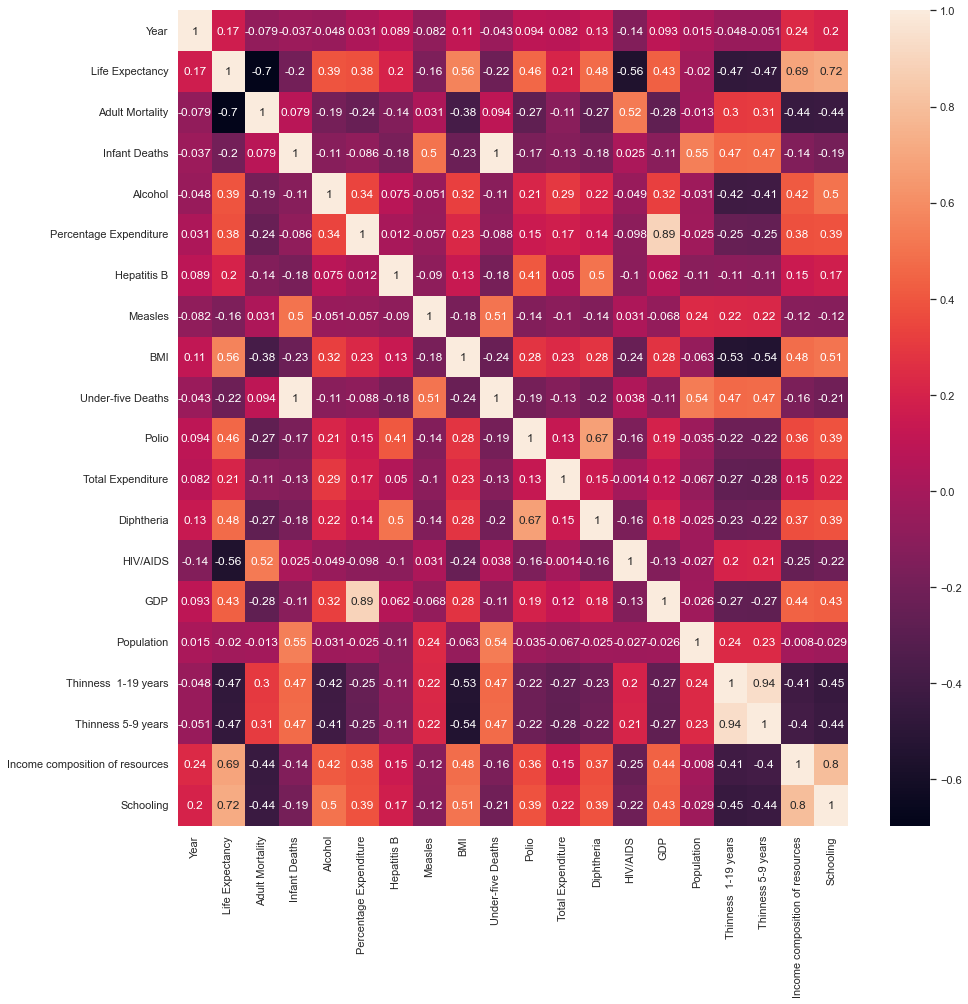

In [276]:
# Heatmap    

sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(df.corr(), annot=True)


## 1. Life Expectancy VS Country's Development.

<AxesSubplot:xlabel='Life Expectancy', ylabel='Status'>

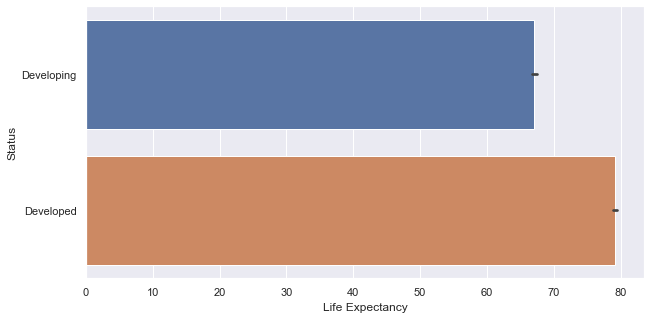

In [277]:
# 1. Life VS Development Status

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(df["Life Expectancy"], df["Status"])

##### Developed countries have higher life expectancy.

## 2. Impact of Education on Life Expectancy.

<AxesSubplot:xlabel='Schooling', ylabel='Life Expectancy'>

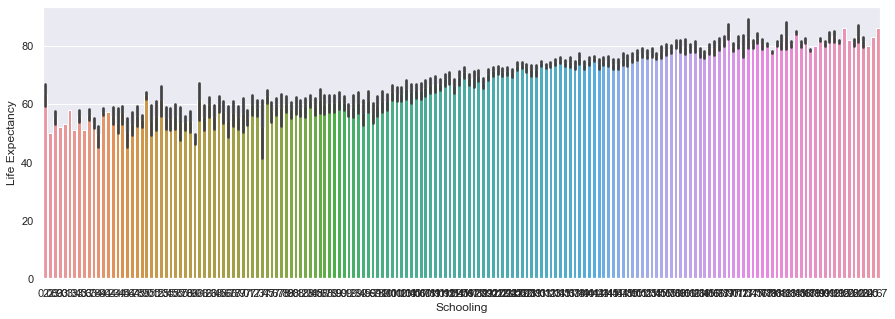

In [278]:
# 2. Life VS Education

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(df["Schooling"], df["Life Expectancy"])


## 3. Countries with highest and lowest life expectancies.

In [279]:
# Highest and lowest expectancy countries

expect_country = df.groupby('Country')['Life Expectancy'].mean().sort_values(ascending = False)
expect_country.head(), expect_country.tail()


(Country
 Japan          82.53750
 Sweden         82.51875
 Iceland        82.44375
 Switzerland    82.33125
 France         82.21875
 Name: Life Expectancy, dtype: float64,
 Country
 Malawi                      49.89375
 Angola                      49.01875
 Lesotho                     48.78125
 Central African Republic    48.51250
 Sierra Leone                46.11250
 Name: Life Expectancy, dtype: float64)

## 4. Variance of expectancies in developed and developing countries.

Variance of developing countries: 15.452304572835123


Text(0.5, 1.0, 'Variance of Life Expectency in Devloped Countries')

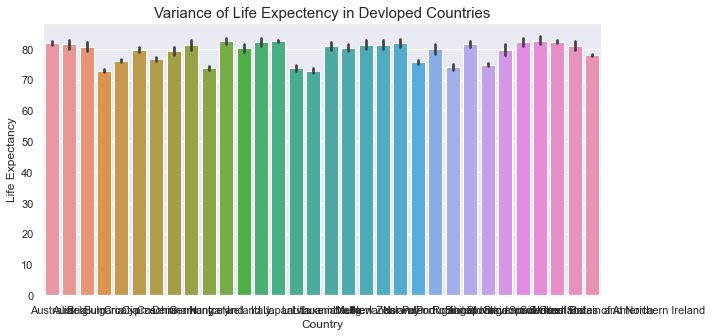

In [280]:
# Variance & Barplot of developed countries

print("Variance of developing countries:", df[df['Status'] == 'Developed']['Life Expectancy'].var())

developed = df[df['Status'] == 'Developed']
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(data = developed, x = 'Country', y = 'Life Expectancy')
plt.title('Variance of Life Expectency in Devloped Countries',fontdict = {'fontsize':15})

Variance of developing countries: 80.79356523644911


Text(0.5, 1.0, 'Variance of Life Expectency in Devloping Countries')

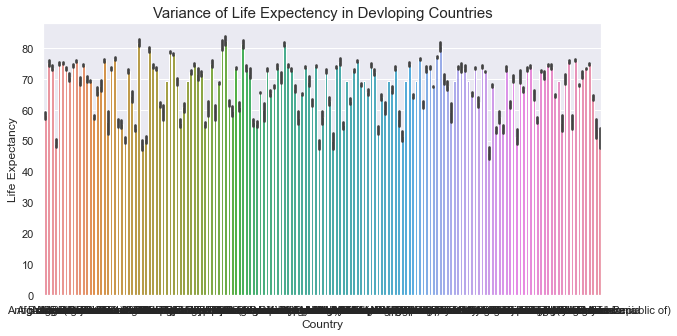

In [281]:
# Variance & Barplot of developing countries

print("Variance of developing countries:", df[df['Status'] == 'Developing']['Life Expectancy'].var())

developing = df[df['Status'] == 'Developing']
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(data = developing, x = 'Country', y ='Life Expectancy')
plt.title('Variance of Life Expectency in Devloping Countries', fontdict = {'fontsize':15})

##### General trend is that life expectancy is higher with better education.

## SG Data

In [282]:
SG = df.loc[df['Country'] == "Singapore"]
SG

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
2313,Singapore,2015,Developed,83.1,55.0,0,1.79,0.000000,96.0,0,...,96.0,5.93819,96.0,0.1,53629.73746,1.275338e+07,2.2,2.2,0.924,15.4
2314,Singapore,2014,Developed,82.9,56.0,0,1.83,7971.646361,96.0,0,...,96.0,4.92000,96.0,0.1,56336.72340,1.275338e+07,2.2,2.2,0.922,15.4
2315,Singapore,2013,Developed,82.7,57.0,0,1.83,714.344102,97.0,138,...,97.0,4.53000,97.0,0.1,5629.18914,1.275338e+07,2.2,2.2,0.920,15.4
2316,Singapore,2012,Developed,82.5,59.0,0,1.89,6041.858981,97.0,42,...,97.0,4.22000,97.0,0.1,54431.16199,1.275338e+07,2.2,2.1,0.917,15.4
2317,Singapore,2011,Developed,82.2,6.0,0,1.80,638.000110,96.0,148,...,96.0,3.93000,96.0,0.1,53166.67581,1.275338e+07,2.1,2.1,0.911,15.2
2318,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,...,96.0,3.96000,96.0,0.1,46569.67951,1.275338e+07,2.1,2.1,0.889,14.5
2319,Singapore,2009,Developed,81.7,62.0,0,1.73,462.930699,96.0,16,...,97.0,4.27000,97.0,0.1,38577.55822,1.275338e+07,2.1,2.1,0.887,14.4
2320,Singapore,2008,Developed,81.4,64.0,0,1.70,3404.130990,97.0,18,...,97.0,3.91000,97.0,0.1,39721.48180,1.275338e+07,2.1,2.1,0.880,14.2
2321,Singapore,2007,Developed,81.1,65.0,0,1.60,3082.973535,96.0,15,...,97.0,3.46000,97.0,0.1,39223.58187,1.275338e+07,2.1,2.0,0.873,14.1
2322,Singapore,2006,Developed,87.0,66.0,0,1.55,2639.376955,95.0,23,...,95.0,3.66000,95.0,0.1,33579.85948,1.275338e+07,2.1,2.0,0.839,13.9


## 5. Life expectancy in SG over the few years.

<AxesSubplot:xlabel='Year', ylabel='Life Expectancy'>

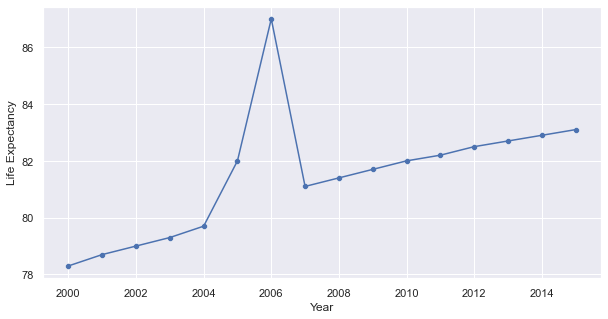

In [283]:
# Scatter & line plot

sns.scatterplot(x = SG["Year"], y = SG["Life Expectancy"])
sns.lineplot(x = SG["Year"], y = SG["Life Expectancy"])

## 

## 6. Adult Mortality, Infant deaths and Life expectancy in SG over the few years.

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

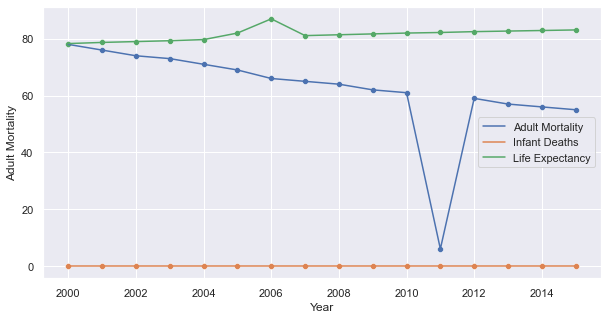

In [284]:
# Scatter & Line plots

sns.set(rc = {'figure.figsize':(10,5)})
sns.scatterplot(x = SG["Year"], y = SG["Adult Mortality"])
sns.lineplot(data = df, x = SG["Year"], y = SG["Adult Mortality"], label = "Adult Mortality")
sns.scatterplot(x = SG["Year"], y = SG["Infant Deaths"])
sns.lineplot(data = df, x = SG["Year"], y = SG["Infant Deaths"], label = "Infant Deaths")
sns.scatterplot(x = SG["Year"], y = SG["Life Expectancy"])
sns.lineplot(data = df, x = SG["Year"], y = SG["Life Expectancy"], label = "Life Expectancy")